# K Nearest Neighbors Project 


## Import Libraries
**Importing pandas,seaborn, and the usual libraries.**

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

## Get the Data
** Reading the 'KNN_Project_Data csv file into a dataframe **

In [5]:
data = pd.read_csv('KNN_Project_Data')

**Checking the head of the dataframe.**

In [6]:
data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Using seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

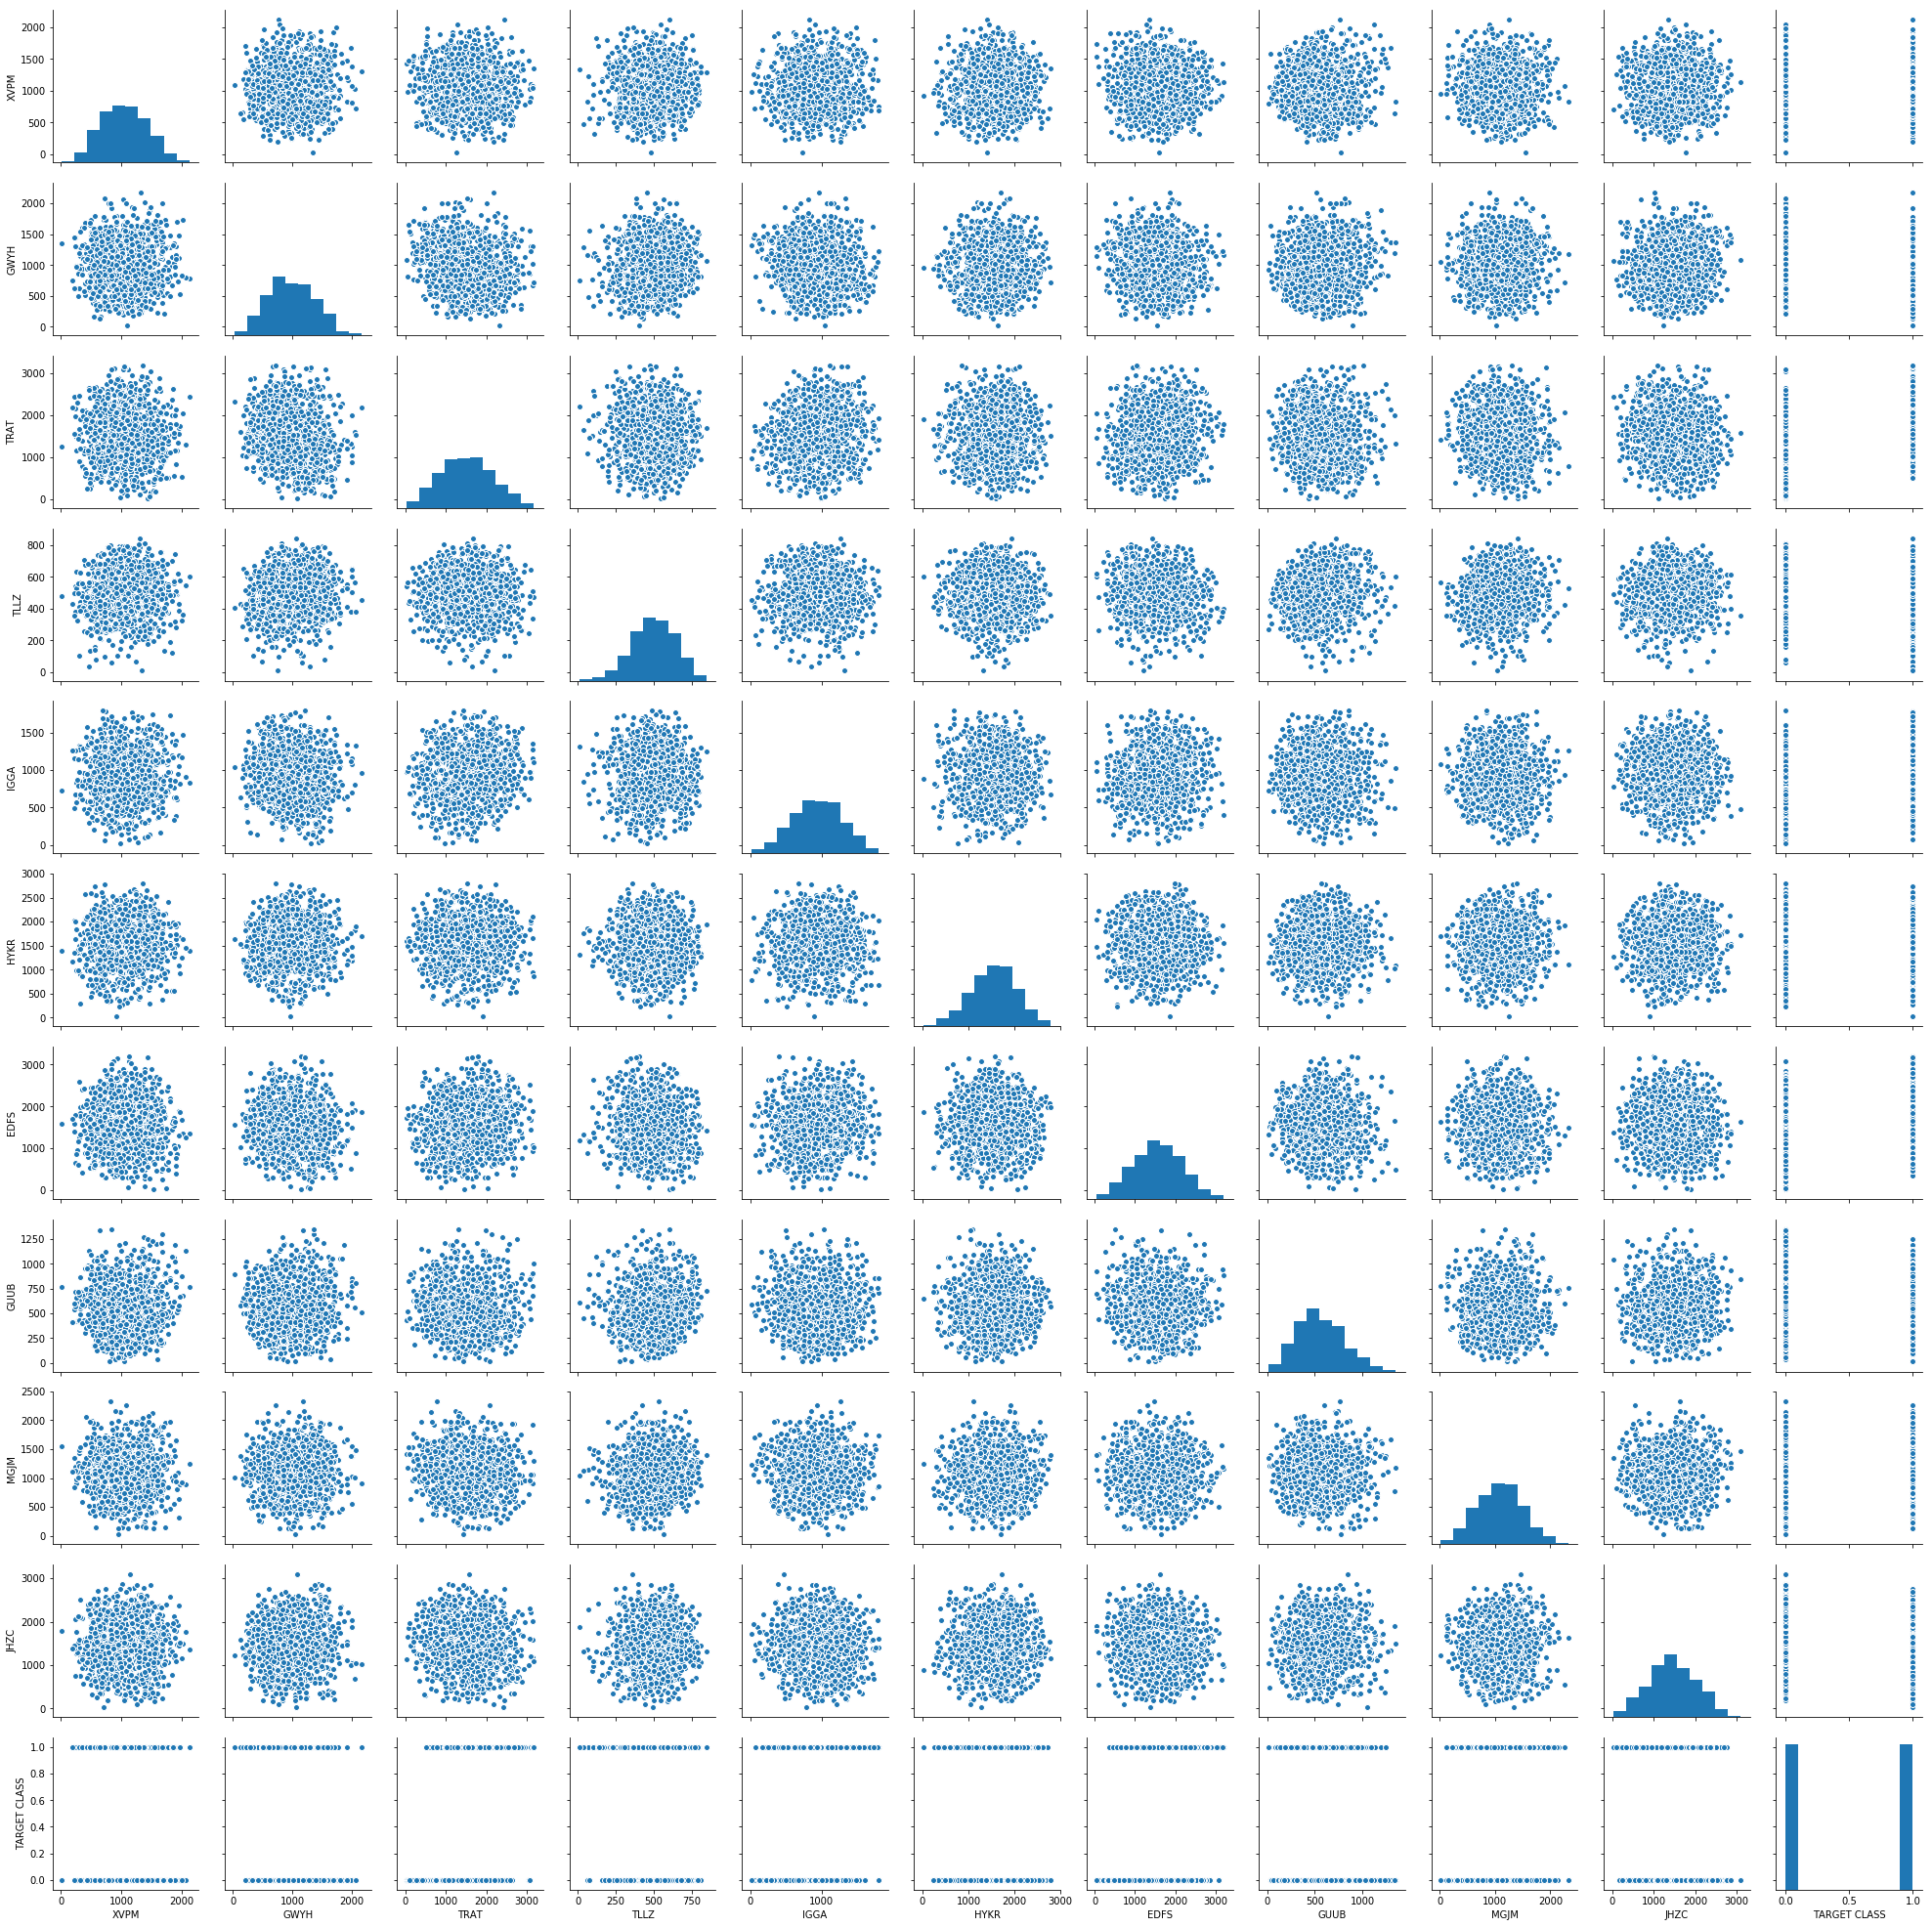

In [7]:
sns.pairplot(data)

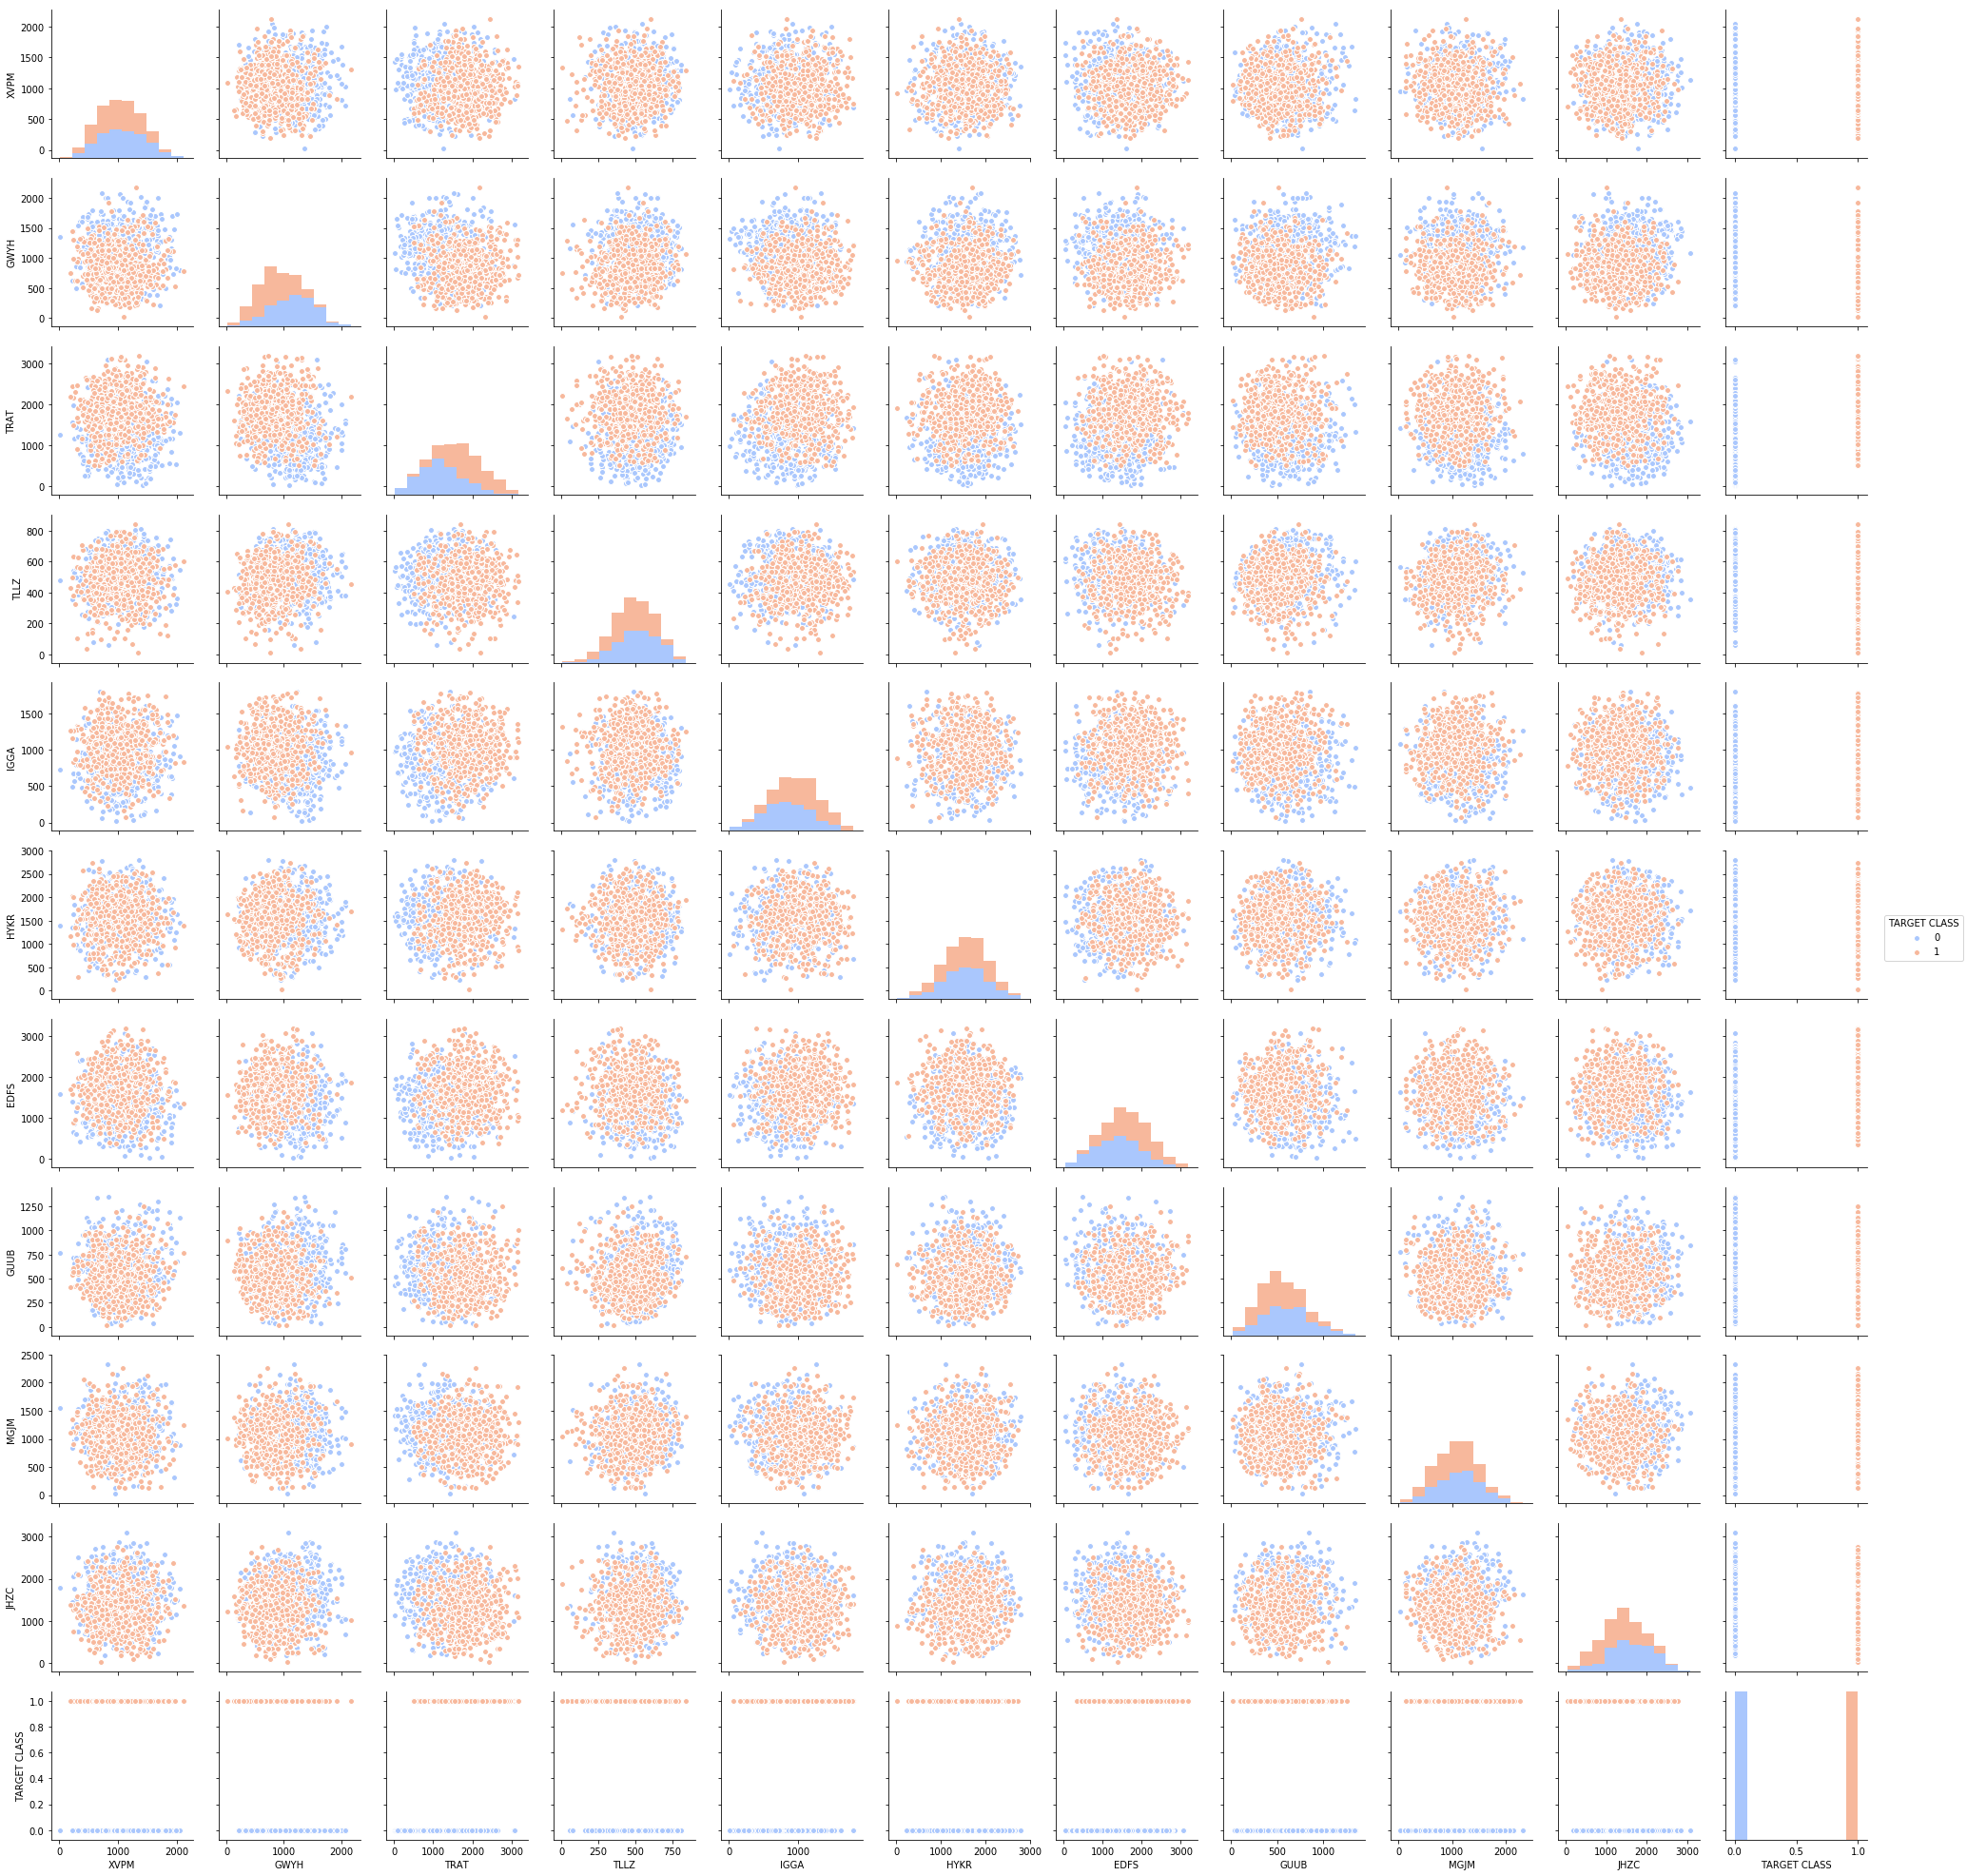

In [8]:
sns.pairplot(data,hue='TARGET CLASS',palette='coolwarm')

# Standardize the Variables

Time to standardize the variables.

** Importing StandardScaler from Scikit learn.**

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [10]:
data.columns

Index(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC', 'TARGET CLASS'],
      dtype='object')

** Fitting scaler to the features.**

In [26]:
scaler.fit(data.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Using the .transform() method to transform the features to a scaled version.**

In [28]:
scaled_data  = scaler.transform(data.drop('TARGET CLASS',axis=1))

# fiitted_data.transform(data.iloc[:,:-1])

In [29]:
scaled_data

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

**Converting the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [30]:
scaled_datafram = pd.DataFrame(data=scaled_data, columns= data.columns[:-1])


In [31]:
scaled_datafram.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

**Using train_test_split to split your data into a training set and a testing set.**

In [17]:
from sklearn.model_selection import train_test_split

In [32]:
X = scaled_datafram
y = data['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Using KNN

**Importing KNeighborsClassifier from scikit learn.**

In [19]:
from sklearn.neighbors import KNeighborsClassifier

**Creating a KNN model instance with n_neighbors=1**

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=1)


**Fitting this KNN model to the training data.**

In [33]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

**Using the predict method to predict values using your KNN model and X_test.**

In [34]:
pred_y = knn_model.predict(X=X_test)

** Creating a confusion matrix and classification report.**

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
print(confusion_matrix(y_test, pred_y))

[[115  35]
 [ 35 115]]


In [37]:
print(classification_report(y_test, pred_y))

             precision    recall  f1-score   support

          0       0.77      0.77      0.77       150
          1       0.77      0.77      0.77       150

avg / total       0.77      0.77      0.77       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [39]:
error_rate = []

for i in range(1,40):
    knn_model_i = KNeighborsClassifier(n_neighbors=i)
    knn_model_i.fit(X_train,y_train)
    y_pred_i = knn_model_i.predict(X=X_test)
    error_rate.append(np.mean(y_pred_i != y_test))
    print('printing',error_rate[i-1])


printing 0.23333333333333334
printing 0.27
printing 0.22666666666666666
printing 0.21666666666666667
printing 0.18666666666666668
printing 0.17333333333333334
printing 0.17333333333333334
printing 0.17333333333333334
printing 0.17666666666666667
printing 0.16333333333333333
printing 0.17
printing 0.16666666666666666
printing 0.17
printing 0.16333333333333333
printing 0.16
printing 0.15333333333333332
printing 0.16666666666666666
printing 0.16333333333333333
printing 0.16666666666666666
printing 0.17666666666666667
printing 0.16
printing 0.17333333333333334
printing 0.17333333333333334
printing 0.18333333333333332
printing 0.18
printing 0.18
printing 0.17666666666666667
printing 0.18
printing 0.17333333333333334
printing 0.17666666666666667
printing 0.17
printing 0.16666666666666666
printing 0.17333333333333334
printing 0.17333333333333334
printing 0.16666666666666666
printing 0.16666666666666666
printing 0.17333333333333334
printing 0.17
printing 0.17333333333333334


**Now creating the following plot using the information from your for loop.**

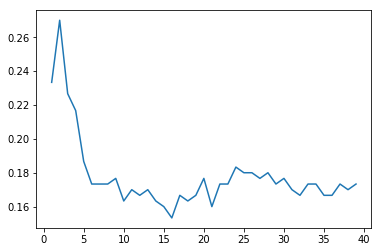

In [41]:
plt.plot(range(1,40),error_rate)

Text(0,0.5,'Error Rate')

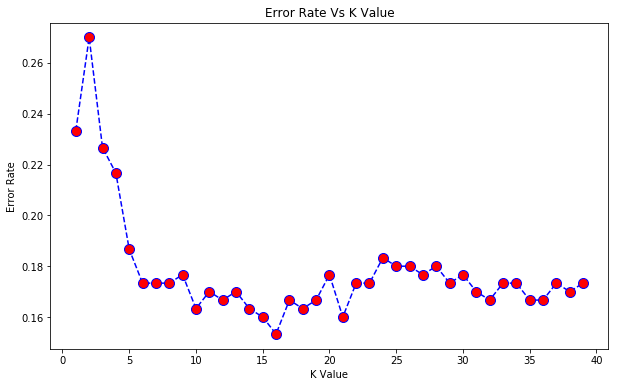

In [48]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate Vs K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')


## Retrain with new K Value

**Retraining your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [58]:
knn_model2 = KNeighborsClassifier(n_neighbors=15)
knn_model2.fit(X=X_train,y=y_train)
y_pred2 = knn_model2.predict(X_test)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_pred=y_pred2,y_true=y_test))

             precision    recall  f1-score   support

          0       0.86      0.81      0.84       150
          1       0.82      0.87      0.84       150

avg / total       0.84      0.84      0.84       300



In [60]:
print(confusion_matrix(y_pred=y_pred2, y_true= y_test))

[[122  28]
 [ 20 130]]


# Great Job!